#**2D Partial Dependence Plots (PDPs)**

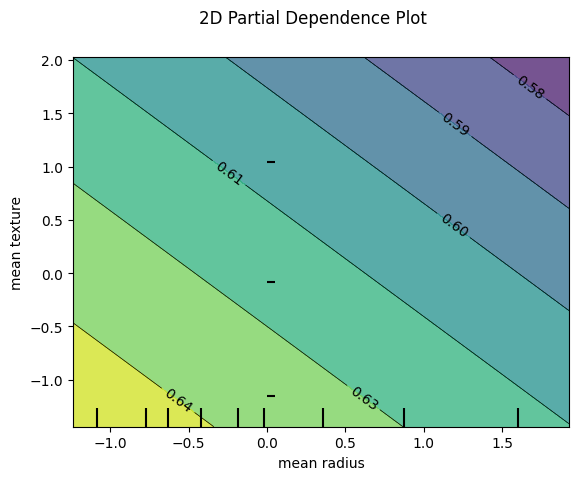

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logit_model = LogisticRegression(max_iter=10000, random_state=42)
logit_model.fit(X_train_scaled, y_train)

# Identify features for the 2D PDP
features = [('mean radius', 'mean texture')]

# Plot 2D Partial Dependence
#fig, ax = plt.subplots(figsize=(8, 6))
# Since we're plotting a 2D interaction, we don't manually specify ax here
PartialDependenceDisplay.from_estimator(logit_model, X_test_scaled, features=features,
                                        feature_names=data.feature_names, kind="average")
plt.suptitle("2D Partial Dependence Plot")
plt.show()
